<a href="https://colab.research.google.com/github/Sapphirevic/Lung-Cancer-prediction/blob/main/lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries


In [ ]:
pip install lifelines

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import chi2_contingency
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Data Overview

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lung_cancer_data.csv to lung_cancer_data.csv


In [ ]:
df = pd.read_csv('lung_cancer_data.csv')
df.head()

Patient_ID  Age  Gender Smoking_History  Tumor_Size_mm Tumor_Location  \
0  Patient0000   68    Male  Current Smoker      81.678677     Lower Lobe   
1  Patient0001   58    Male    Never Smoked      78.448272     Lower Lobe   
2  Patient0002   44    Male   Former Smoker      67.714305     Lower Lobe   
3  Patient0003   72    Male  Current Smoker      70.806008     Lower Lobe   
4  Patient0004   37  Female    Never Smoked      87.272433     Lower Lobe   

       Stage          Treatment  Survival_Months         Ethnicity  ...  \
0  Stage III            Surgery               44          Hispanic  ...   
1    Stage I  Radiation Therapy              101         Caucasian  ...   
2    Stage I       Chemotherapy               69  African American  ...   
3  Stage III       Chemotherapy               95  African American  ...   
4   Stage IV  Radiation Therapy              105             Asian  ...   

  Alanine_Aminotransferase_Level Aspartate_Aminotransferase_Level  \
0                      27.985571                        46.801214   
1                      30.120956                        39.711531   
2                       5.882418                        32.640602   
3                      38.908154                        44.319393   
4                      26.344877                        15.746906   

  Creatinine_Level   LDH_Level Calcium_Level Phosphorus_Level Glucose_Level  \
0         1.245849  239.240255     10.366307         3.547734    113.919243   
1         1.463231  233.515237     10.081731         2.945020    101.321578   
2         0.630109  169.037460      8.660892         4.637399     78.214177   
3         0.594342  213.967590      8.832669         3.617098    127.895361   
4         1.478239  118.187543      9.247609         4.773255    148.801185   

  Potassium_Level Sodium_Level  Smoking_Pack_Years  
0        4.968163   139.822861           17.006956  
1        3.896795   135.449361           93.270893  
2        4.369050   143.377155           70.348376  
3        4.348474   138.586005           19.828128  
4        3.671976   141.230724           81.047456  

[5 rows x 38 columns]

In [ ]:
df.info()
print('\n This is the shape of the data\n', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        23658 non-null  object 
 1   Age                               23658 non-null  int64  
 2   Gender                            23658 non-null  object 
 3   Smoking_History                   23658 non-null  object 
 4   Tumor_Size_mm                     23658 non-null  float64
 5   Tumor_Location                    23658 non-null  object 
 6   Stage                             23658 non-null  object 
 7   Treatment                         23658 non-null  object 
 8   Survival_Months                   23658 non-null  int64  
 9   Ethnicity                         23658 non-null  object 
 10  Insurance_Type                    23658 non-null  object 
 11  Family_History                    23658 non-null  object 
 12  Como

In [ ]:
df.isna().sum()

Patient_ID                          0
Age                                 0
Gender                              0
Smoking_History                     0
Tumor_Size_mm                       0
Tumor_Location                      0
Stage                               0
Treatment                           0
Survival_Months                     0
Ethnicity                           0
Insurance_Type                      0
Family_History                      0
Comorbidity_Diabetes                0
Comorbidity_Hypertension            0
Comorbidity_Heart_Disease           0
Comorbidity_Chronic_Lung_Disease    0
Comorbidity_Kidney_Disease          0
Comorbidity_Autoimmune_Disease      0
Comorbidity_Other                   0
Performance_Status                  0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Blood_Pressure_Pulse                0
Hemoglobin_Level                    0
White_Blood_Cell_Count              0
Platelet_Count                      0
Albumin_Leve

## Descriptive Statistics

In [ ]:
df.nunique()

Patient_ID                          23658
Age                                    50
Gender                                  2
Smoking_History                         3
Tumor_Size_mm                       23658
Tumor_Location                          3
Stage                                   4
Treatment                               4
Survival_Months                       119
Ethnicity                               5
Insurance_Type                          4
Family_History                          2
Comorbidity_Diabetes                    2
Comorbidity_Hypertension                2
Comorbidity_Heart_Disease               2
Comorbidity_Chronic_Lung_Disease        2
Comorbidity_Kidney_Disease              2
Comorbidity_Autoimmune_Disease          2
Comorbidity_Other                       2
Performance_Status                      5
Blood_Pressure_Systolic                90
Blood_Pressure_Diastolic               50
Blood_Pressure_Pulse                   40
Hemoglobin_Level                  

In [ ]:
df.describe().T

count        mean        std         min  \
Age                               23658.0   54.439344  14.396386   30.000000   
Tumor_Size_mm                     23658.0   55.383736  26.004354   10.004279   
Survival_Months                   23658.0   59.863809  34.246042    1.000000   
Performance_Status                23658.0    1.999915   1.413675    0.000000   
Blood_Pressure_Systolic           23658.0  134.462381  26.020492   90.000000   
Blood_Pressure_Diastolic          23658.0   84.475780  14.409826   60.000000   
Blood_Pressure_Pulse              23658.0   79.585299  11.546690   60.000000   
Hemoglobin_Level                  23658.0   14.000137   2.301411   10.000070   
White_Blood_Cell_Count            23658.0    6.735637   1.879292    3.501213   
Platelet_Count                    23658.0  299.867482  86.897568  150.017892   
Albumin_Level                     23658.0    3.998981   0.576931    3.000080   
Alkaline_Phosphatase_Level        23658.0   75.027604  25.936175   30.007235   
Alanine_Aminotransferase_Level    23658.0   22.504677  10.047864    5.001090   
Aspartate_Aminotransferase_Level  23658.0   30.133226  11.560915   10.000860   
Creatinine_Level                  23658.0    0.999459   0.287517    0.500001   
LDH_Level                         23658.0  174.734575  43.230997  100.002721   
Calcium_Level                     23658.0    9.261114   0.719875    8.000018   
Phosphorus_Level                  23658.0    3.742771   0.721708    2.500069   
Glucose_Level                     23658.0  109.895553  23.109136   70.000420   
Potassium_Level                   23658.0    4.245646   0.431968    3.500034   
Sodium_Level                      23658.0  140.028215   2.894568  135.000934   
Smoking_Pack_Years                23658.0   49.913594  28.870940    0.016800   

                                         25%         50%         75%  \
Age                                42.000000   54.000000   67.000000   
Tumor_Size_mm                      32.972797   55.296297   78.190014   
Survival_Months                    30.000000   60.000000   89.000000   
Performance_Status                  1.000000    2.000000    3.000000   
Blood_Pressure_Systolic           112.000000  134.000000  157.000000   
Blood_Pressure_Diastolic           72.000000   85.000000   97.000000   
Blood_Pressure_Pulse               70.000000   80.000000   90.000000   
Hemoglobin_Level                   11.990625   13.983383   15.999260   
White_Blood_Cell_Count              5.108723    6.729774    8.353701   
Platelet_Count                    224.884576  299.933443  375.437029   
Albumin_Level                       3.504579    3.999931    4.499102   
Alkaline_Phosphatase_Level         52.624860   75.089745   97.453941   
Alanine_Aminotransferase_Level     13.816180   22.547943   31.092935   
Aspartate_Aminotransferase_Level   20.065339   30.271772   40.107488   
Creatinine_Level                    0.748845    1.001183    1.249173   
LDH_Level                         137.444977  174.390634  212.228273   
Calcium_Level                       8.640877    9.259304    9.883248   
Phosphorus_Level                    3.120107    3.730837    4.364422   
Glucose_Level                      89.828616  109.949488  130.061977   
Potassium_Level                     3.871842    4.242236    4.618318   
Sodium_Level                      137.540078  140.002209  142.541883   
Smoking_Pack_Years                 25.026793   49.926220   74.924580   

                                         max  
Age                                79.000000  
Tumor_Size_mm                      99.990554  
Survival_Months                   119.000000  
Performance_Status                  4.000000  
Blood_Pressure_Systolic           179.000000  
Blood_Pressure_Diastolic          109.000000  
Blood_Pressure_Pulse               99.000000  
Hemoglobin_Level                   17.999957  
White_Blood_Cell_Count              9.999535  
Platelet_Count                    449.974734  
Albumin_Level        

In [ ]:
print(df.Stage)


0        Stage III
1          Stage I
2          Stage I
3        Stage III
4         Stage IV
           ...    
23653      Stage I
23654     Stage IV
23655     Stage IV
23656      Stage I
23657      Stage I
Name: Stage, Length: 23658, dtype: object


In [ ]:
df.columns.tolist()

['Patient_ID',
 'Age',
 'Gender',
 'Smoking_History',
 'Tumor_Size_mm',
 'Tumor_Location',
 'Stage',
 'Treatment',
 'Survival_Months',
 'Ethnicity',
 'Insurance_Type',
 'Family_History',
 'Comorbidity_Diabetes',
 'Comorbidity_Hypertension',
 'Comorbidity_Heart_Disease',
 'Comorbidity_Chronic_Lung_Disease',
 'Comorbidity_Kidney_Disease',
 'Comorbidity_Autoimmune_Disease',
 'Comorbidity_Other',
 'Performance_Status',
 'Blood_Pressure_Systolic',
 'Blood_Pressure_Diastolic',
 'Blood_Pressure_Pulse',
 'Hemoglobin_Level',
 'White_Blood_Cell_Count',
 'Platelet_Count',
 'Albumin_Level',
 'Alkaline_Phosphatase_Level',
 'Alanine_Aminotransferase_Level',
 'Aspartate_Aminotransferase_Level',
 'Creatinine_Level',
 'LDH_Level',
 'Calcium_Level',
 'Phosphorus_Level',
 'Glucose_Level',
 'Potassium_Level',
 'Sodium_Level',
 'Smoking_Pack_Years']

## Analysis

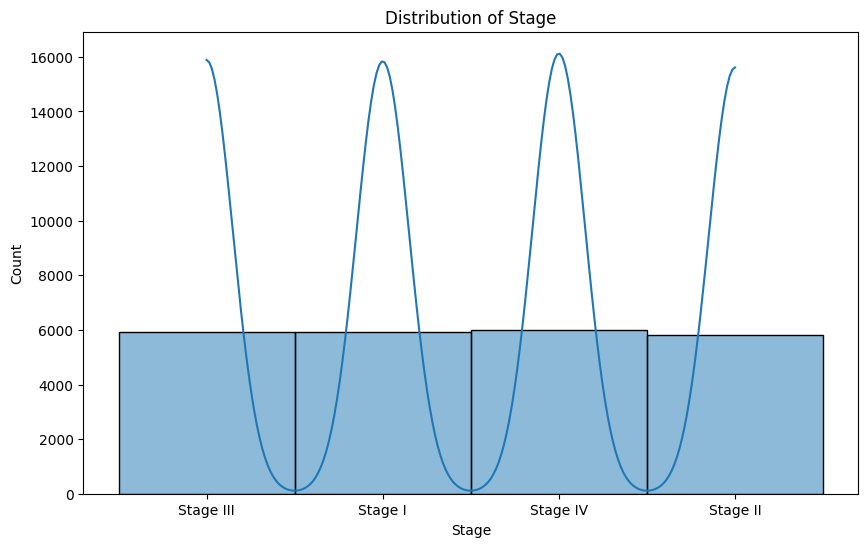

In [ ]:
target = 'Stage'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=target, kde=True, discrete=True)
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.ylabel('Count')
plt.show()

In [ ]:
stage_counts = df['Stage'].value_counts()
stage_percentages = stage_counts / len(df) * 100

fig = px.pie(
    values=stage_percentages,
    names=stage_percentages.index,
    title='Distribution of Cancer Stages',
    labels={'label': 'Stage', 'value': 'Percentage'},
    hover_data=[stage_counts],
    custom_data=[stage_counts]
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate="<b>%{label}</b><br>" +
                  "Percentage: %{percent}<br>" +
                  "Count: %{customdata[0]}<extra></extra>"
)

fig.show()

In [ ]:
gender_column = 'Gender'
gender_counts = df[gender_column].value_counts()

pie_data = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values
})

# Calculate total for percentages
total = pie_data['Count'].sum()
pie_data['Percentage'] = pie_data['Count'] / total * 100

males = gender_counts.get('Male', 0)
females = gender_counts.get('Female', 0)
ratio = males / females if females > 0 else float('inf')

print(f"\nNumber of Males: {males}")
print(f"Number of Females: {females}\n")
print(f"Ratio of Males to Females: {ratio:.2f}\n")
print(f"Percentage of Males: {pie_data.loc[pie_data['Gender'] == 'Male', 'Percentage'].values[0]:.2f}%")
print(f"Percentage of Females: {pie_data.loc[pie_data['Gender'] == 'Female', 'Percentage'].values[0]:.2f}%")


Number of Males: 11924
Number of Females: 11734

Ratio of Males to Females: 1.02

Percentage of Males: 50.40%
Percentage of Females: 49.60%


In [ ]:
fig = px.pie(
    data_frame=pie_data,
    values='Count',
    names='Gender',
    title='Gender Distribution in the Dataset',
    hover_data=['Percentage']
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate="<b>%{label}</b><br>" +
                  "Count: %{value}<br>" +
                  "Percentage: %{customdata[0]:.2f}%<extra></extra>"
)

fig.show()


#### subplots

In [ ]:
gender_column = 'Gender'
age_column = 'Age'

# Gender Analysis
gender_counts = df[gender_column].value_counts()
males = gender_counts.get('Male', 0)
females = gender_counts.get('Female', 0)

ratio = males / females if females > 0 else float('inf')

print(f"Number of Males: {males}")
print(f"Number of Females: {females}")
print(f"Ratio of Males to Females: {ratio:.2f}")

# Age Analysis
age_stats = df[age_column].describe()
print("\nAge Statistics:")
print(age_stats)

# Create subplots: 2 rows, 2 columns
fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type':'domain'}, {'type':'xy'}],
                           [{'type':'xy'}, {'type':'xy'}]],
                    subplot_titles=("Gender Distribution", "Age Distribution",
                                    "Age Distribution by Gender", "Age Boxplot by Gender"))

# 1. Gender Pie Chart
fig.add_trace(go.Pie(labels=gender_counts.index, values=gender_counts.values, name="Gender"),
              row=1, col=1)

# 2. Age Histogram
fig.add_trace(go.Histogram(x=df[age_column], name="Age"),
              row=1, col=2)

# 3. Age Distribution by Gender
for gender in gender_counts.index:
    fig.add_trace(go.Histogram(x=df[df[gender_column]==gender][age_column],
                               name=gender, opacity=0.7),
                  row=2, col=1)

# 4. Age Boxplot by Gender
fig.add_trace(go.Box(y=df[age_column], x=df[gender_column], name="Age by Gender"),
              row=2, col=2)

# Update layout
fig.update_layout(height=800, width=1000, title_text="Gender and Age Analysis")
fig.show()

# Additional statistics
print("\nMedian Age by Gender:")
print(df.groupby(gender_column)[age_column].median())

print("\nAge Range by Gender:")
age_range = df.groupby(gender_column)[age_column].agg(['min', 'max'])
print(age_range)

Number of Males: 11924
Number of Females: 11734
Ratio of Males to Females: 1.02

Age Statistics:
count    23658.000000
mean        54.439344
std         14.396386
min         30.000000
25%         42.000000
50%         54.000000
75%         67.000000
max         79.000000
Name: Age, dtype: float64



Median Age by Gender:
Gender
Female    54.0
Male      54.0
Name: Age, dtype: float64

Age Range by Gender:
        min  max
Gender          
Female   30   79
Male     30   79


#### Chi-square statistic

In [ ]:
# 1. Calculate the proportion of patients with lung cancer for each family history category
family_history_risk = df.groupby('Family_History')['Stage'].apply(lambda x: (x != 'Stage 0').mean()).reset_index()
family_history_risk.columns = ['Family_History', 'Cancer_Risk']

# 2. Create a bar plot
fig = px.bar(family_history_risk, x='Family_History', y='Cancer_Risk',
             title='Risk of Lung Cancer by Family History',
             labels={'Cancer_Risk': 'Proportion with Lung Cancer'},
             text_auto='.2%')

fig.update_traces(textposition='outside')
fig.show()

# 3. Perform chi-square test of independence
contingency_table = pd.crosstab(df['Family_History'], df['Stage'] != 'Stage 0')
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

# 4. Calculate relative risk
with_history = df[df['Family_History'] == 'Yes']
without_history = df[df['Family_History'] == 'No']

risk_with_history = (with_history['Stage'] != 'Stage 0').mean()
risk_without_history = (without_history['Stage'] != 'Stage 0').mean()

relative_risk = risk_with_history / risk_without_history

print(f"\nRelative Risk: {relative_risk:.2f}")
print(f"This means patients with a family history of lung cancer are {relative_risk:.2f} times more likely to develop lung cancer compared to those without a family history.")

# 5. Create a summary table
summary = pd.DataFrame({
    'Family_History': ['Yes', 'No'],
    'Cancer_Risk': [risk_with_history, risk_without_history],
    'Total_Patients': [len(with_history), len(without_history)]
})

fig = go.Figure(data=[go.Table(
    header=dict(values=list(summary.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[summary['Family_History'], summary['Cancer_Risk'].map('{:.2%}'.format), summary['Total_Patients']],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title='Summary of Lung Cancer Risk by Family History')
fig.show()

Chi-square statistic: 0.0
p-value: 1.0

Relative Risk: 1.00
This means patients with a family history of lung cancer are 1.00 times more likely to develop lung cancer compared to those without a family history.


The Chi-Square test is a handy tool for exploring relationships between categorical variables.


As depicted in the formula, the Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

A chi-square statistic of 0.0 indicates that there is no difference between the observed and expected frequencies

(which assumes no association between the two variables).

 A p-value of 1.0 means that there is a 100% probability that the observed data would occur under the null hypothesis.

 Relative risk (RR) is a measure that compares the risk of a certain event (in this case, developing lung cancer) occurring in two different groups. An RR of 1.00 means that the risk of developing lung cancer is the same for patients with a family history of lung cancer as it is for those without a family history.

 Overall, the chi-square statistic and p-value indicate that there is no statistically significant association between family history and lung cancer risk.



#### ANOVA to test

In [ ]:
# Create a box plot of smoking pack years by cancer stage
fig = px.box(df, x='Stage', y='Smoking_Pack_Years',
             title='Distribution of Smoking Pack Years by Cancer Stage')
fig.show()

# Perform one-way ANOVA to test if there's a significant difference in pack years across stages
stages = df['Stage'].unique()
pack_years_by_stage = [df[df['Stage'] == stage]['Smoking_Pack_Years'] for stage in stages]
f_statistic, p_value = stats.f_oneway(*pack_years_by_stage)

print(f"One-way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Calculate average pack years for each stage
avg_pack_years = df.groupby('Stage')['Smoking_Pack_Years'].mean().sort_values(ascending=False)
print("\nAverage Smoking Pack Years by Stage:")
print(avg_pack_years)

# Create a scatter plot of pack years vs tumor size, colored by stage
fig = px.scatter(df, x='Smoking_Pack_Years', y='Tumor_Size_mm', color='Stage',
                 title='Smoking Pack Years vs Tumor Size',
                 labels={'Smoking_Pack_Years': 'Smoking Pack Years', 'Tumor_Size_mm': 'Tumor Size (mm)'})
fig.show()

One-way ANOVA results:
F-statistic: 3.220706542860412
p-value: 0.021685282125378093

Average Smoking Pack Years by Stage:
Stage
Stage III    50.788217
Stage I      50.009871
Stage IV     49.662592
Stage II     49.185201
Name: Smoking_Pack_Years, dtype: float64


A one-way ANOVA test is used to determine whether there are statistically significant differences between the means of three or more independent (unrelated) groups.

The F-statistic of 3.2207 indicates that there is some variation in the average smoking pack years among the different stages of lung cancer.

The p-value of approximately 0.022 is less than 0.05, which means there is a statistically significant difference in the average smoking pack years among the different stages of lung cancer.

The average smoking pack years are relatively similar across stages, with Stage III having the highest average (50.79) and Stage II having the lowest (49.19). Despite the small differences in means, the ANOVA test indicates that these differences are statistically significant.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

# Assuming df is your DataFrame

# 1. Cancer Stage Distribution by Tumor Location
stage_by_location = pd.crosstab(df['Tumor_Location'], df['Stage'], normalize='index')

fig = px.bar(stage_by_location,
             title='Cancer Stage Distribution by Tumor Location',
             labels={'value': 'Proportion', 'Stage': 'Cancer Stage'},
             barmode='stack')
fig.update_layout(xaxis_title='Tumor Location', yaxis_title='Proportion')
fig.show()

# 2. Average Survival Months by Tumor Location
survival_by_location = df.groupby('Tumor_Location')['Survival_Months'].mean().sort_values(ascending=False)

fig = px.bar(survival_by_location,
             title='Average Survival Months by Tumor Location',
             labels={'value': 'Average Survival Months', 'Tumor_Location': 'Tumor Location'})
fig.update_layout(xaxis_title='Tumor Location', yaxis_title='Average Survival Months')
fig.show()

# 3. Statistical Test: One-way ANOVA for Survival Months across Tumor Locations
locations = df['Tumor_Location'].unique()
survival_data = [df[df['Tumor_Location'] == loc]['Survival_Months'] for loc in locations]
f_statistic, p_value = stats.f_oneway(*survival_data)

print("One-way ANOVA results for Survival Months across Tumor Locations:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# 4. Tumor Size by Location
tumor_size_by_location = df.groupby('Tumor_Location')['Tumor_Size_mm'].mean().sort_values(ascending=False)

fig = px.bar(tumor_size_by_location,
             title='Average Tumor Size by Location',
             labels={'value': 'Average Tumor Size (mm)', 'Tumor_Location': 'Tumor Location'})
fig.update_layout(xaxis_title='Tumor Location', yaxis_title='Average Tumor Size (mm)')
fig.show()

# 5. Treatment Distribution by Tumor Location
treatment_by_location = pd.crosstab(df['Tumor_Location'], df['Treatment'], normalize='index')

fig = px.bar(treatment_by_location,
             title='Treatment Distribution by Tumor Location',
             labels={'value': 'Proportion', 'Treatment': 'Treatment Type'},
             barmode='stack')
fig.update_layout(xaxis_title='Tumor Location', yaxis_title='Proportion')
fig.show()

# 6. Summary Table
summary = df.groupby('Tumor_Location').agg({
    'Patient_ID': 'count',
    'Survival_Months': 'mean',
    'Tumor_Size_mm': 'mean',
    'Stage': lambda x: (x != 'Stage 0').mean()  # Proportion of cancer cases
}).round(2)

summary.columns = ['Patient Count', 'Avg Survival Months', 'Avg Tumor Size (mm)', 'Cancer Incidence']
summary = summary.sort_values('Cancer Incidence', ascending=False)

fig = go.Figure(data=[go.Table(
    header=dict(values=['Tumor Location'] + list(summary.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[summary.index] + [summary[col] for col in summary.columns],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title='Summary of Cancer Characteristics by Tumor Location')
fig.show()

One-way ANOVA results for Survival Months across Tumor Locations:
F-statistic: 1.6366052870312398
p-value: 0.19466170628027052


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

# Assuming df is your DataFrame

# 1. Impact of Smoking History on Cancer Stage
fig = px.histogram(df, x='Smoking_History', color='Stage',
                   title='Distribution of Cancer Stages by Smoking History',
                   labels={'Smoking_History': 'Smoking History', 'count': 'Number of Patients'},
                   barnorm='percent')
fig.update_layout(yaxis_title='Percentage of Patients')
fig.show()

# 2. Correlation between Smoking Pack Years and Survival Months
correlation = df['Smoking_Pack_Years'].corr(df['Survival_Months'])
fig = px.scatter(df, x='Smoking_Pack_Years', y='Survival_Months', color='Stage',
                 title=f'Smoking Pack Years vs Survival Months (Correlation: {correlation:.2f})',
                 labels={'Smoking_Pack_Years': 'Smoking Pack Years', 'Survival_Months': 'Survival Months'})
fig.show()

# 3. Average Survival Months by Smoking History
survival_by_smoking = df.groupby('Smoking_History')['Survival_Months'].mean().sort_values(ascending=False)
fig = px.bar(survival_by_smoking,
             title='Average Survival Months by Smoking History',
             labels={'value': 'Average Survival Months', 'Smoking_History': 'Smoking History'})
fig.update_layout(xaxis_title='Smoking History', yaxis_title='Average Survival Months')
fig.show()

# 4. Impact of Smoking on Tumor Size
fig = px.box(df, x='Smoking_History', y='Tumor_Size_mm',
             title='Tumor Size Distribution by Smoking History',
             labels={'Smoking_History': 'Smoking History', 'Tumor_Size_mm': 'Tumor Size (mm)'})
fig.show()

# 5. Statistical Test: ANOVA for Tumor Size across Smoking History categories
smoking_categories = df['Smoking_History'].unique()
tumor_sizes = [df[df['Smoking_History'] == cat]['Tumor_Size_mm'] for cat in smoking_categories]
f_statistic, p_value = stats.f_oneway(*tumor_sizes)

print("One-way ANOVA results for Tumor Size across Smoking History categories:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# 6. Smoking Pack Years by Age
fig = px.scatter(df, x='Age', y='Smoking_Pack_Years', color='Stage',
                 title='Smoking Pack Years by Age',
                 labels={'Age': 'Age', 'Smoking_Pack_Years': 'Smoking Pack Years'})
fig.show()

# 7. Summary Table
summary = df.groupby('Smoking_History').agg({
    'Patient_ID': 'count',
    'Survival_Months': 'mean',
    'Tumor_Size_mm': 'mean',
    'Stage': lambda x: (x != 'Stage 0').mean(),  # Proportion of cancer cases
    'Smoking_Pack_Years': 'mean'
}).round(2)

summary.columns = ['Patient Count', 'Avg Survival Months', 'Avg Tumor Size (mm)', 'Cancer Incidence', 'Avg Pack Years']
summary = summary.sort_values('Cancer Incidence', ascending=False)

fig = go.Figure(data=[go.Table(
    header=dict(values=['Smoking History'] + list(summary.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[summary.index] + [summary[col] for col in summary.columns],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title='Summary of Cancer Characteristics by Smoking History')
fig.show()

One-way ANOVA results for Tumor Size across Smoking History categories:
F-statistic: 1.0159551701775535
p-value: 0.36207223655432347


## Survival Analysis

In [ ]:
from lifelines import CoxPHFitter

# Prepare the data
df['Event'] = 1  # Assuming all events are observed. Adjust if you have censored data.
cph = CoxPHFitter()
cph.fit(df, duration_col='Survival_Months', event_col='Event')

# Print summary
print(cph.print_summary())

# Plot the partial effects of a few variables
cph.plot_partial_effects_on_outcome(['Age', 'Smoking_Pack_Years', 'Tumor_Size_mm'])

## Logistics Regression

In [ ]:
# Prepare the data
X = df[['Age', 'Smoking_Pack_Years', 'Tumor_Size_mm']]
y = (df['Stage'] != 'Stage 0').astype(int)  # Binary outcome: cancer vs no cancer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

## Random Forest Classifier

              precision    recall  f1-score   support

           1       0.25      0.29      0.27      1145
           2       0.23      0.23      0.23      1153
           3       0.27      0.24      0.26      1230
           4       0.23      0.23      0.23      1204

    accuracy                           0.25      4732
   macro avg       0.25      0.25      0.25      4732
weighted avg       0.25      0.25      0.25      4732



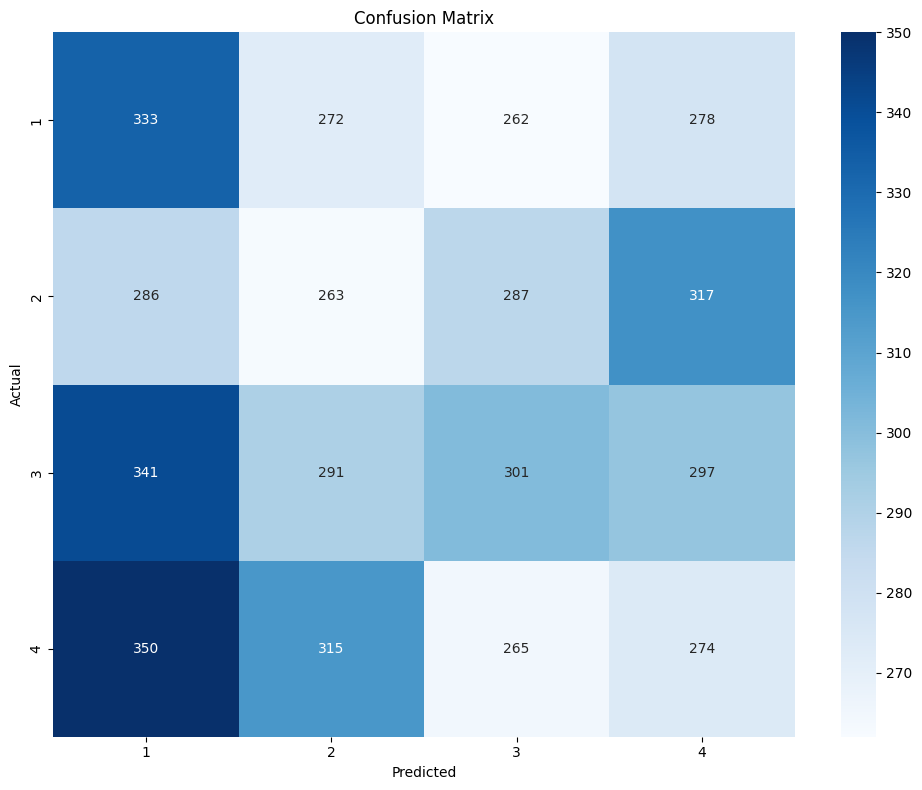


Top 10 Most Important Features:
                             feature  importance
3                      Tumor_Size_mm    0.042803
33                Smoking_Pack_Years    0.042733
31                   Potassium_Level    0.042718
22                     Albumin_Level    0.042552
25  Aspartate_Aminotransferase_Level    0.042505
30                     Glucose_Level    0.042497
21                    Platelet_Count    0.042488
24    Alanine_Aminotransferase_Level    0.042338
20            White_Blood_Cell_Count    0.042317
28                     Calcium_Level    0.042303


In [ ]:
X = df.drop(['Patient_ID', 'Stage', 'Treatment', 'Survival_Months'], axis=1)
y = df['Stage']

# Encode categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(np.arange(len(np.unique(y))) + 0.5, np.unique(y))
plt.yticks(np.arange(len(np.unique(y))) + 0.5, np.unique(y))
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## Gradient Booster Regressor

In [ ]:

# Prepare the data
X = df[['Age', 'Smoking_Pack_Years', 'Tumor_Size_mm', 'Stage']]
X = pd.get_dummies(X, columns=['Stage'], drop_first=True)
y = df['Survival_Months']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 1176.7149302546106
R-squared Score: -0.0018075237926855614


#### XGBOOST

              precision    recall  f1-score   support

           0       0.23      0.23      0.23      1145
           1       0.24      0.24      0.24      1153
           2       0.26      0.25      0.25      1230
           3       0.25      0.26      0.26      1204

    accuracy                           0.25      4732
   macro avg       0.25      0.25      0.25      4732
weighted avg       0.25      0.25      0.25      4732



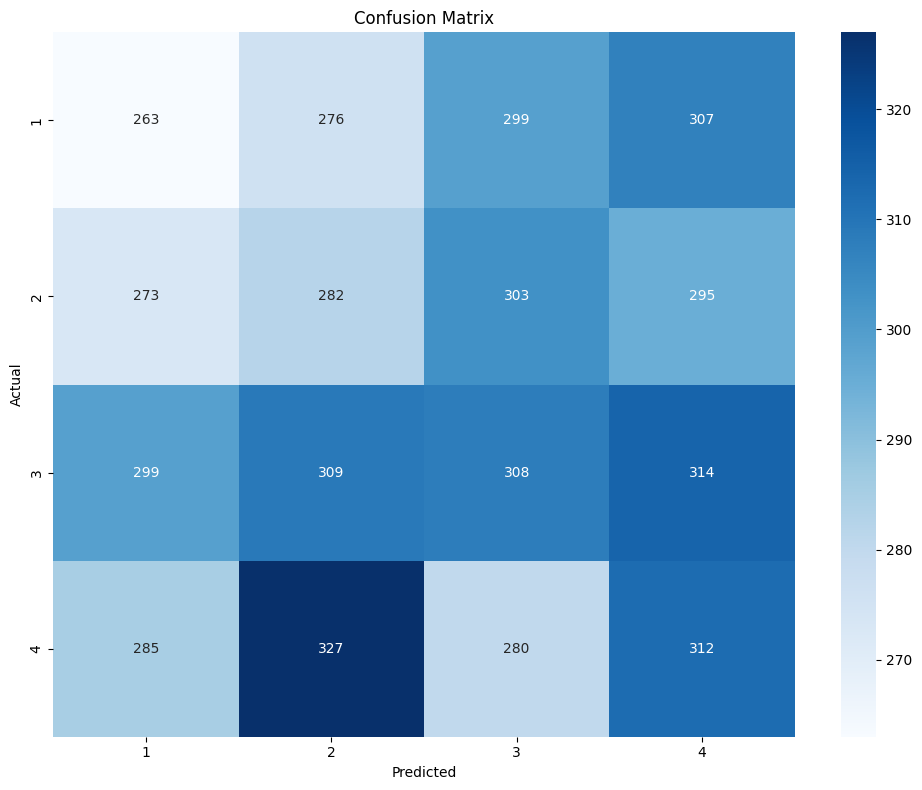

<Figure size 1500x1000 with 0 Axes>

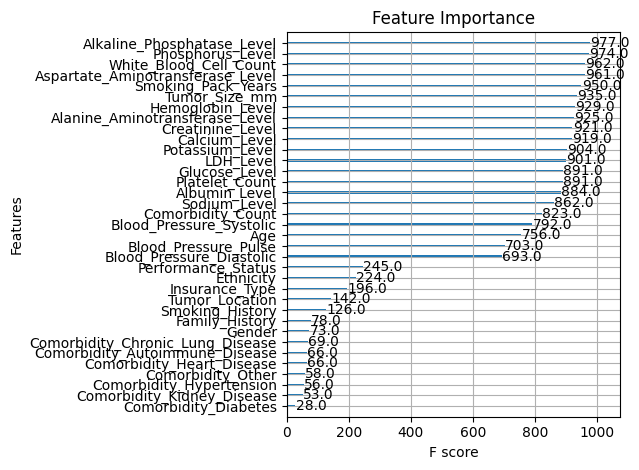


Top 10 Most Important Features:
                             feature  importance
23        Alkaline_Phosphatase_Level       977.0
29                  Phosphorus_Level       974.0
20            White_Blood_Cell_Count       962.0
25  Aspartate_Aminotransferase_Level       961.0
33                Smoking_Pack_Years       950.0
3                      Tumor_Size_mm       935.0
19                  Hemoglobin_Level       929.0
24    Alanine_Aminotransferase_Level       925.0
26                  Creatinine_Level       921.0
28                     Calcium_Level       919.0


In [ ]:
import xgboost as xgb
from xgboost import plot_importance

# Assuming df is your DataFrame

# Prepare the data
X = df.drop(['Patient_ID', 'Stage', 'Treatment', 'Survival_Months'], axis=1)
y = df['Stage']

# Encode categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Encode the target variable
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softprob',
    'num_class': len(np.unique(y)),
    'eval_metric': 'mlogloss'
}

# Train the model
num_round = 100
model = xgb.train(params, dtrain, num_round)

# Make predictions
y_pred = model.predict(dtest)
y_pred_labels = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_labels))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(np.arange(len(np.unique(y))) + 0.5, le.classes_)
plt.yticks(np.arange(len(np.unique(y))) + 0.5, le.classes_)
plt.tight_layout()
plt.show()

# Feature importance
plt.figure(figsize=(15, 10))
plot_importance(model)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Get feature importance scores
importance_scores = model.get_score(importance_type='weight')
importance_df = pd.DataFrame({'feature': list(importance_scores.keys()),
                              'importance': list(importance_scores.values())})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))